In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


## implementing the random selection for better understanding

In [14]:
import random
N=10000
d=10
ads_selected=[]
total_reward=0
for n in range(N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=df.values[n,ad]
    total_reward+=reward

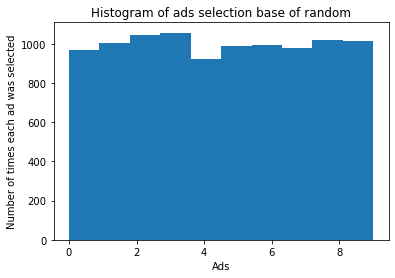

In [18]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection base of random")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected");

# implement UCB Algorithm

In [32]:
import math
numbers_of_selction=[0]*d
sums_of_rewards=[0]*10
ads_selected=[]
N=1000
d=10
total_rewards=0
for n in range(N):
    ad=0
    max_upper_bound=0
    for i in range(d):
        if (numbers_of_selction[i]>0):
            average_reward=sums_of_rewards[i]/numbers_of_selction[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/numbers_of_selction[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selction[ad]+=1
    reward=df.values[n,ad]
    sums_of_rewards[ad]+=reward
    total_rewards+=reward

In [33]:
total_rewards

155

(array([109.,  79.,  53.,  68., 287.,  53.,  86., 140.,  64.,  61.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

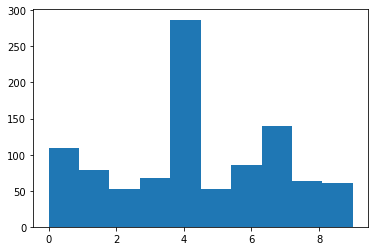

In [34]:
plt.hist(ads_selected)

In [39]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
